# THỰC HÀNH: PHÂN TÍCH THÀNH PHẦN CHÍNH

### Đưa dữ liệu từ file excel (table 2) vào R.

In [1]:
data = read.csv('table2.csv')
head(data)

,thanhpho,SO2,Nhietdo,Soluong,DanSo,Gio,LuongMua,SoNgay
,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,Albany,46,47.6,44,116,8.8,33.36,135
2,Albuquerque,11,56.8,46,244,8.9,7.77,58
3,Atlanta,24,61.5,368,497,9.1,48.34,115
4,Baltimore,47,55.0,625,905,9.6,41.31,111
5,Buffalo,11,47.1,391,463,12.4,36.11,166
6,Charleston,31,55.2,35,71,6.5,40.75,148


### 1) Tính các giá trị riêng và vectơ riêng tương ứng của ma trận tương quan mẫu.

In [2]:
data_numeric = data[2:8]

cor_mat = cor(data_numeric)
cor_mat

,SO2,Nhietdo,Soluong,DanSo,Gio,LuongMua,SoNgay
SO2,1.00000000,-0.50078724,0.7811817,0.6545701146,0.04751475,0.0160532916,0.37146670
Nhietdo,-0.50078724,1.00000000,-0.2230183,-0.0992581486,0.04462403,0.3535643009,-0.53139975
Soluong,0.78118170,-0.22301834,1.0000000,0.9609771107,0.32208239,-0.0343255027,0.11316434
DanSo,0.65457011,-0.09925815,0.9609771,1.0000000000,0.34973905,-0.0006451822,0.02956935
Gio,0.04751475,0.04462403,0.3220824,0.3497390541,1.00000000,-0.0913805212,0.02034854
LuongMua,0.01605329,0.35356430,-0.0343255,-0.0006451822,-0.09138052,1.0000000000,0.38934065
SoNgay,0.37146670,-0.53139975,0.1131643,0.0295693481,0.02034854,0.3893406480,1.00000000


In [3]:
eigen = eigen(cor_mat)
eigen$values

[1] 2.91084504 1.56072435 1.30735066 0.88023318 0.19687611 0.12416937 0.01980129

In [4]:
eigen$vectors

0.52096782,-0.1529578,-0.01199717,0.25631027,0.74634780,0.19935977,0.20634486
-0.28763736,0.4912635,0.48916810,0.14049617,0.08690719,0.63969175,0.01191515
0.54849916,0.2261182,0.07151683,0.14926148,-0.18130420,0.02441424,-0.76626256
0.50836681,0.3157964,0.12859145,0.13855793,-0.47966584,-0.08883438,0.60673788
0.19519472,0.3642556,0.05993107,-0.86840514,0.25366269,-0.08192149,0.02101819
-0.02360551,-0.2112159,0.82632278,0.04392958,0.11659393,-0.50508574,-0.03722565
0.21888566,-0.6380541,0.22917056,-0.34209837,-0.30744539,0.52984886,0.01277291


### 2) Đưa ra tỉ lệ biến sai tổng cộng của từng thành phần chính.

In [5]:
pca = princomp(data_numeric, cor = TRUE)
summary(pca)

Importance of components:
                         Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.706120 1.2492895 1.1433944 0.9382074 0.44370724
Proportion of Variance 0.415835 0.2229606 0.1867644 0.1257476 0.02812516
Cumulative Proportion  0.415835 0.6387956 0.8255600 0.9513076 0.97943276
                           Comp.6      Comp.7
Standard deviation     0.35237675 0.140717070
Proportion of Variance 0.01773848 0.002828756
Cumulative Proportion  0.99717124 1.000000000

Tỉ lệ biến sai tổng cộng của $PC_1$, $PC_2$, $PC_3$, $PC_4$, $PC_5$, $PC_6$, $PC_7$ lần lượt là 0.415835, 0.2229606, 0.1867644, 0.1257476, 0.02812516, 0.01773848, 0.002828756.

### 3) Biểu diễn thành phần chính thứ nhất theo các biến ban đầu.

In [6]:
summary(pca, loadings = TRUE)

Importance of components:
                         Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.706120 1.2492895 1.1433944 0.9382074 0.44370724
Proportion of Variance 0.415835 0.2229606 0.1867644 0.1257476 0.02812516
Cumulative Proportion  0.415835 0.6387956 0.8255600 0.9513076 0.97943276
                           Comp.6      Comp.7
Standard deviation     0.35237675 0.140717070
Proportion of Variance 0.01773848 0.002828756
Cumulative Proportion  0.99717124 1.000000000

Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
SO2       0.521  0.153         0.256  0.746  0.199  0.206
Nhietdo  -0.288 -0.491 -0.489  0.140         0.640       
Soluong   0.548 -0.226         0.149 -0.181        -0.766
DanSo     0.508 -0.316 -0.129  0.139 -0.480         0.607
Gio       0.195 -0.364        -0.868  0.254              
LuongMua         0.211 -0.826         0.117 -0.505       
SoNgay    0.219  0.638 -0.229 -0.342 -0.307  0.530       

$\begin{split}
PC_1 & =  0.521 \cdot SO2 - 0.228 \cdot Nhietdo + 0.548 \cdot Soluong + 0.508 \cdot DanSo \\
     & + 0.195 \cdot Gio + 0.219 \cdot SoNgay
\end{split}$

### 4) Cần bao nhiêu thành phần chính để thu được 95% thông tin về tập dữ liệu ban đầu?

Do $\frac{\lambda_1 + \lambda_2 + \lambda_3 + \lambda_4}{\sum{\lambda}} = 0.9513076 > 0.95$ nên chỉ cần 4 thành phần chính.

### 5) Vẽ biểu đồ biplot cho bộ dữ liệu.

In [7]:
# install.packages("stats")
library(stats)

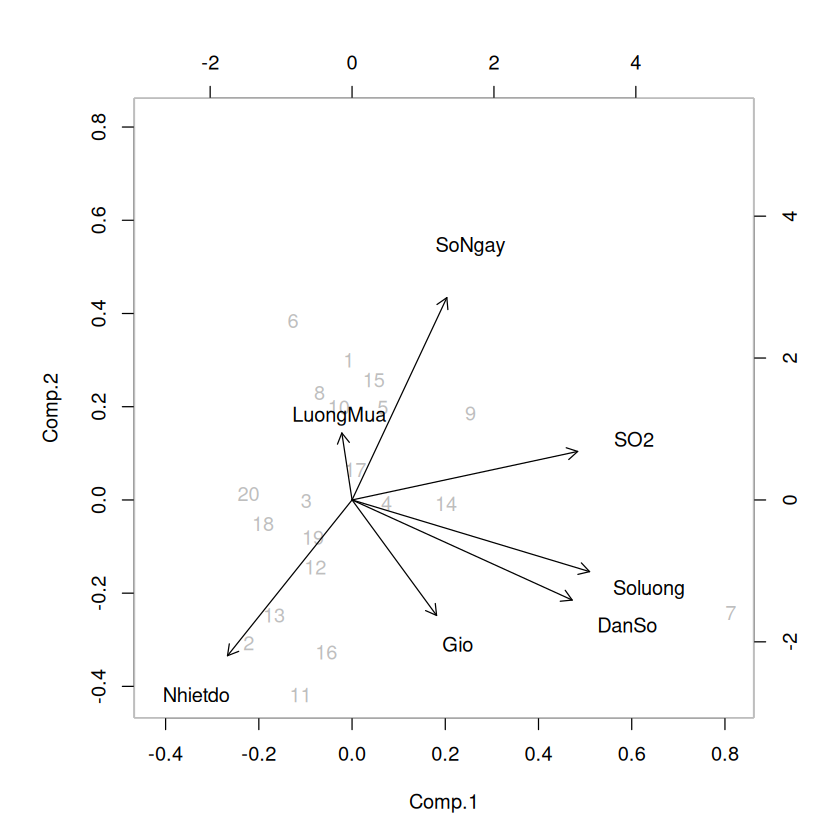

In [8]:
biplot(pca, col = c("gray", "black"))